In [1]:
import os
import sys
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# to get deterministic output
tf.random.set_seed(123)

sys.path.append(os.path.abspath(".."))

### Load the Dataset

In [2]:
(X_train_ds, y_train_ds), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
#(ds_train, ds_test), ds_info = tfds.load('mnist', split=['train', 'test'], as_supervised=True, with_info=True)

# Normalize to [0,1]
X_train_ds = X_train_ds / 255.0
X_test = X_test / 255.0

X_train, X_val, y_train, y_val = train_test_split(
    X_train_ds, 
    y_train_ds, 
    test_size=0.1, 
    random_state=42, 
    stratify=y_train_ds,
)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Val set  : {X_val.shape}, {y_val.shape}")
print(f"Test set : {X_test.shape}, {y_test.shape}")

Train set: (54000, 28, 28), (54000,)
Val set  : (6000, 28, 28), (6000,)
Test set : (10000, 28, 28), (10000,)


### Visualize the Dataset

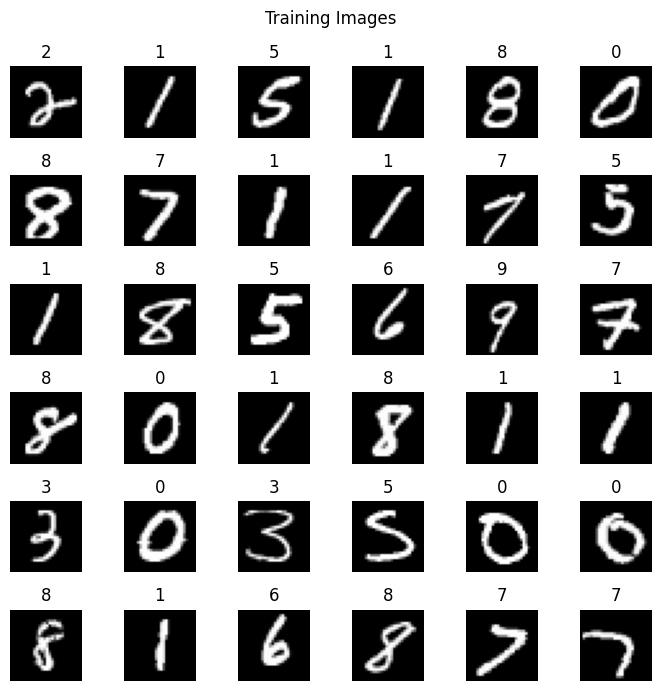

In [3]:
plt.figure(figsize=(7, 7))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.title(f"{y_train[i]}")
plt.suptitle("Training Images") 
plt.tight_layout()
plt.show()

### Design the Model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),             # Input 28x28 image
    tf.keras.layers.Flatten(),                         # Convert 28x28 image to 784 vector
    tf.keras.layers.Dense(128, activation='relu'),     # Hidden layer with ReLU
    tf.keras.layers.Dense(10, activation='softmax')    # Output layer (10 classes)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [5]:
training = model.fit(X_train,
                     y_train,
                     epochs=10,
                     validation_data=(X_val, y_val),
                     verbose=1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9226 - loss: 0.2714 - val_accuracy: 0.9540 - val_loss: 0.1659
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9638 - loss: 0.1220 - val_accuracy: 0.9648 - val_loss: 0.1249
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9753 - loss: 0.0835 - val_accuracy: 0.9673 - val_loss: 0.1125
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9820 - loss: 0.0611 - val_accuracy: 0.9688 - val_loss: 0.1085
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9864 - loss: 0.0460 - val_accuracy: 0.9695 - val_loss: 0.1032
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9904 - loss: 0.0348 - val_accuracy: 0.9690 - val_loss: 0.1021
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9934 - loss: 0.0261 - val_accuracy: 0.9697 - val_loss: 0.1062
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9944 - loss: 0.0210 - 

### Evaluate the Model

In [6]:
test_scores = model.evaluate(X_test, y_test)

scoring_metric_names = ['Loss', 'Accuracy']
for i, metric_name in enumerate(scoring_metric_names):
    metric = metric_name.lower()
    val_metric = f'val_{metric}'
    train_score = training.history[metric][-1]
    val_score = training.history[val_metric][-1]
    print(f"Train {metric_name}: {train_score:.2f}")
    print(f"Val {metric_name}  : {val_score:.2f}")
    print(f"Test {metric_name} : {test_scores[i]:.2f}")
    print()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.1026
Train Loss: 0.01
Val Loss  : 0.11
Test Loss : 0.10

Train Accuracy: 1.00
Val Accuracy  : 0.97
Test Accuracy : 0.98



### Make Prediction

In [7]:
probas = model.predict(X_test)

# Convert probablily distribution to classes
y_preds = np.argmax(probas, axis=1)

correct_indices = []
incorrect_indices = []
for i in range(len(y_preds)):
    if y_preds[i] == y_test[i]:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Visualize Confusion Matrix

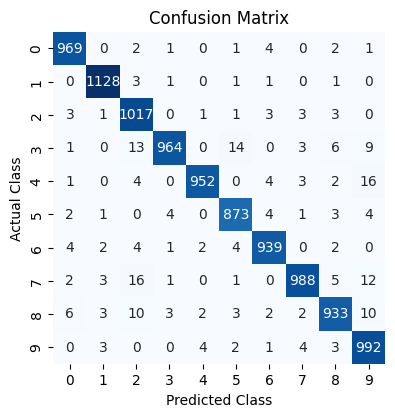

In [8]:
cmat_str = confusion_matrix(y_test, y_preds)

# Plot confusion matrix
plt.figure(figsize=(25, 25))
ax = plt.subplot(5, 2, 3 * 2 - 1, aspect='equal')
sns.heatmap(cmat_str, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_title(f'Confusion Matrix')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class')
ax.tick_params(labelsize=10)
plt.show()

### Visualize Training Metrices

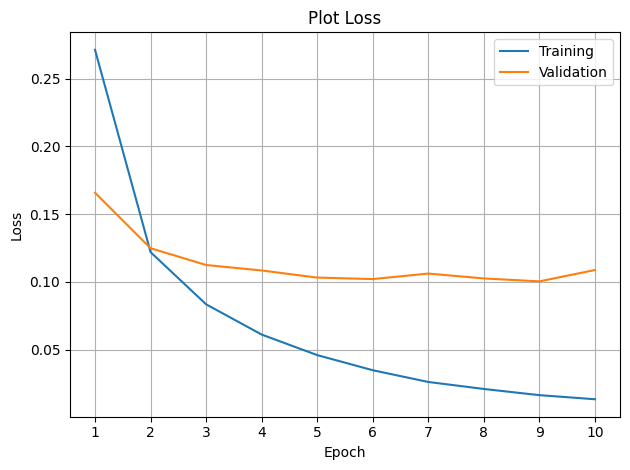

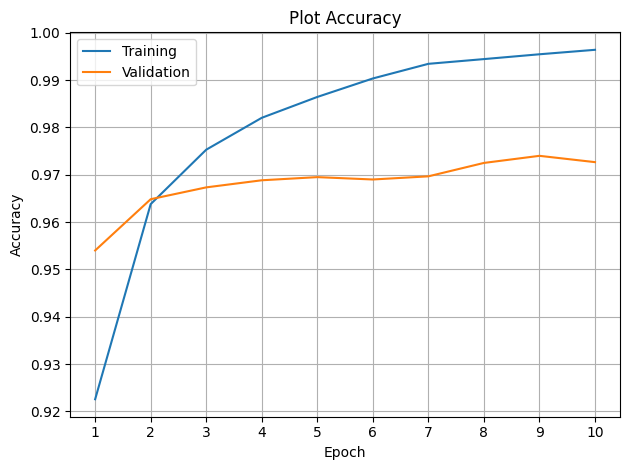

In [9]:
epochs = len(training.epoch)
for metric_name in scoring_metric_names:
  metric = metric_name.lower()
  val_metric = f'val_{metric}'
  plt.plot(np.arange(1, epochs+1), training.history[metric], label=f'Training')
  plt.plot(np.arange(1, epochs+1), training.history[val_metric], label=f'Validation')
  plt.xticks(np.arange(1, epochs+1, 1))
  plt.title(f'Plot {metric_name}')
  plt.xlabel('Epoch')
  plt.ylabel(metric_name)
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

### Visualize the Prediction

Correct Predictions: 9755


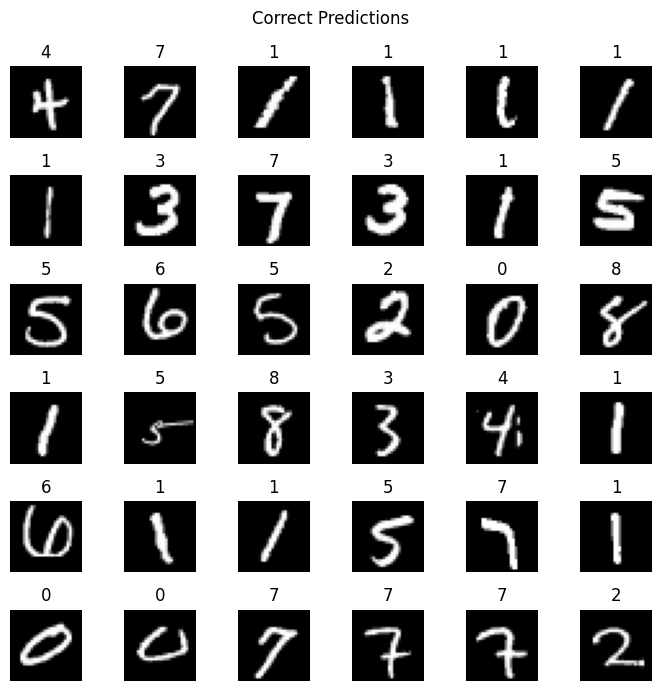

In [10]:
print("Correct Predictions:", len(correct_indices))

plt.figure(figsize=(7,7))
for i in range(36):
    idx = random.choice(correct_indices)
    plt.subplot(6,6,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"{y_preds[idx]}")
plt.suptitle("Correct Predictions")
plt.tight_layout()
plt.show()

Incorrect Predictions: 245


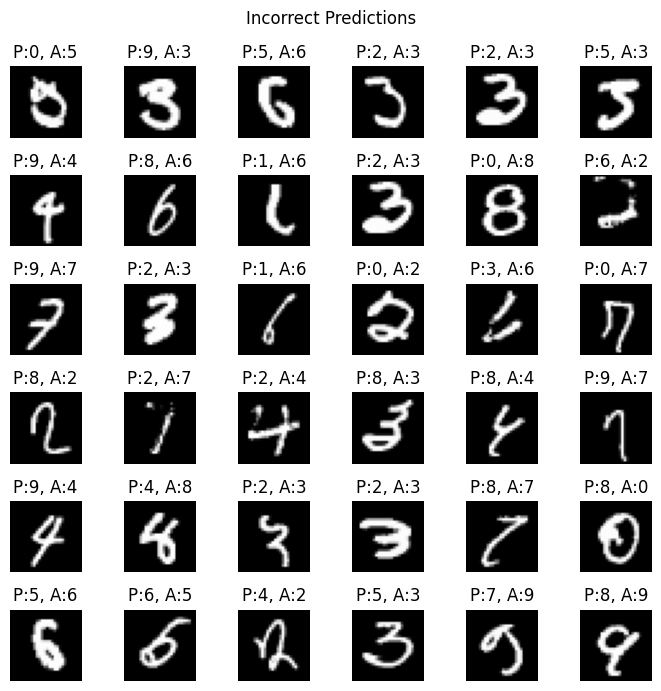

In [11]:
print("Incorrect Predictions:", len(incorrect_indices))

plt.figure(figsize=(7,7))
for i in range(36):
    idx = random.choice(incorrect_indices)
    plt.subplot(6,6,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"P:{y_preds[idx]}, A:{y_test[idx]}")
plt.suptitle("Incorrect Predictions")
plt.tight_layout()
plt.show()